# Linear Regression, Multilinear Regression, Polynomial Regression

Source: web

# Part 1 - Linear Regression

$$f(x)=b_0+w x $$

known value is $y$. The residuals can be determined as, e.g.
 = $$e = y-f(x)$$

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
import sys

In [4]:
#sys.path

In [5]:
x = np.array([[1,3],[7, 6],[9,2],[12,3],[5, 10]])
print("This is initial x=\n",x)
print("The shape of the above array is=",np.shape(x))
#If you want to reshape it such that no prescribed action on rows but you want 5 columns:
x = np.array([[1,3],[7, 6],[9,2],[12,3],[5, 10]]).reshape((-1, 5))
print("Following is the reshaped x with 5 columns=\n",x)
print("The shape of the above array is=",np.shape(x))

This is initial x=
 [[ 1  3]
 [ 7  6]
 [ 9  2]
 [12  3]
 [ 5 10]]
The shape of the above array is= (5, 2)
Following is the reshaped x with 5 columns=
 [[ 1  3  7  6  9]
 [ 2 12  3  5 10]]
The shape of the above array is= (2, 5)


In [6]:
x = np.array([1, 7, 9, 12, 5, 10]).reshape((-1,1)) # reshape in such a way that there is only one column
# but number of rows are as required to be comparible with the data. Since it is already a vector, it does not matter.
# this function is very useful when you want to vectorize a matrix.
y = np.array([2, 5, 7, 11, 15, 20]).reshape((-1,1))
print("x=",x)
print("y=",y)
#x = np.array([[1,3],[7, 6],[9,2],[12,3],[5, 10]])
#y = np.array([[1,3],[7, 6],[9,2],[12,3],[5, 10]])
model = LinearRegression().fit(x, y) # the earlier two statements are not needed now.

x= [[ 1]
 [ 7]
 [ 9]
 [12]
 [ 5]
 [10]]
y= [[ 2]
 [ 5]
 [ 7]
 [11]
 [15]
 [20]]


In [7]:
r_sq = model.score(x, y)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.25914024014778314


### The coefficient of determination $R^2$ is defined as $(1 − \frac{u}{v})$, where $u$ is the residual sum of squares $((y_{true} - y_{pred})^2).sum()$ and v is the total sum of squares $((y_{true} - y_{true.mean()})^2).sum()$. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
Ref. \url{https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score}

In [8]:
print('intercept:', model.intercept_) # value of b

intercept: [3.64655172]


In [9]:
print('slope:', model.coef_) # value of w

slope: [[0.86637931]]


In [10]:
y_pred = model.predict(x)

In [11]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 4.51293103]
 [ 9.7112069 ]
 [11.44396552]
 [14.04310345]
 [ 7.97844828]
 [12.31034483]]


In [12]:
# The above is same Y that one could determine using y = wx + b
y_pred = model.intercept_ + model.coef_ * x

In [13]:
# Compare the above values against the ones that we got using our model
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 4.51293103]
 [ 9.7112069 ]
 [11.44396552]
 [14.04310345]
 [ 7.97844828]
 [12.31034483]]


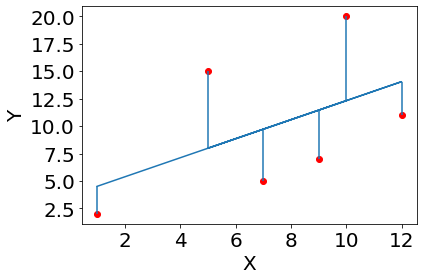

In [14]:
# Plot x, y, y_pred
plt.plot(x,y_pred)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x,y,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.scatter(x,y+dy)
plt.vlines(x,y,y_pred)
plt.show()

### Let us check some other measures of error

In [15]:
from sklearn.metrics import mean_squared_error,r2_score

### $((y_{true} - y_{pred})^2).mean()$

In [16]:
mean_squared_error(y, y_pred)

27.658764367816094

$|y_{true} - y_{pred}|.mean()$

In [17]:
mean_squared_error(y, y_pred,squared=False)

5.259160043943909

In [18]:
r2_score(y, y_pred) # Note that this function is not operating on model or, it is not part of model().
# It is part of the linear regression metrics module of sklearn and it takes y and y_pred as arguments.

0.25914024014778314

# Part 2 - Multilinear regression / Multivariate Linear regression

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[0, 1], [4, 2], [12, 3], [23, 4], [31, 10], [44, 14], [53, 32], [58, 31]]
y = [3, 4, 17, 12, 30, 21, 35, 41]
x, y = np.array(x), np.array(y)

In [20]:
print(x)

[[ 0  1]
 [ 4  2]
 [12  3]
 [23  4]
 [31 10]
 [44 14]
 [53 32]
 [58 31]]


In [21]:
print(y)
y.reshape((-1,1))
# 5.28068114  7.23286623 10.80306423 15.58677191 20.82783087 27.42306157 37.07869005 38.76703399 # these are predicted values

[ 3  4 17 12 30 21 35 41]


array([[ 3],
       [ 4],
       [17],
       [12],
       [30],
       [21],
       [35],
       [41]])

In [22]:
model = LinearRegression().fit(x, y)

In [23]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8543138851027825
intercept: 4.946508946586551
slope: [0.40450323 0.33417219]


In [24]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.28068114  7.23286623 10.80306423 15.58677191 20.82783087 27.42306157
 37.07869005 38.76703399]


In [25]:
#x_new = np.arange(16).reshape((-1, 2))
print(x)
print(y_pred)

[[ 0  1]
 [ 4  2]
 [12  3]
 [23  4]
 [31 10]
 [44 14]
 [53 32]
 [58 31]]
[ 5.28068114  7.23286623 10.80306423 15.58677191 20.82783087 27.42306157
 37.07869005 38.76703399]


### How should we plot multilinear regression?
### Ideally x1, x2 make point in the variable 'plane' and y is the predicted value in that plane.
### This, it be a represented by a surface.
### In the following we plot first x1 vs. y and then x2 vs. y

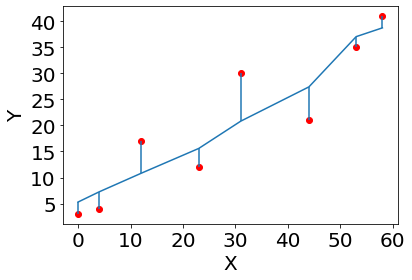

In [26]:
plt.plot(x[:,0],y_pred)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x[:,0],y,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.vlines(x[:,0],y,y_pred)
plt.show()

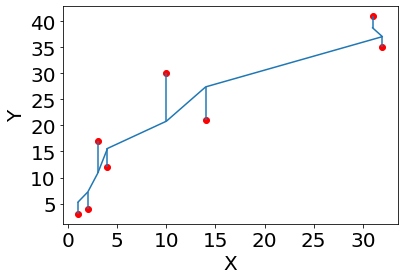

In [27]:
plt.plot(x[:,1],y_pred)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x[:,1],y,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.vlines(x[:,1],y,y_pred)
plt.show()

In [28]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.28068114  6.75803197  8.23538281  9.71273364 11.19008448]


(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 [Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10'),
  Text(0, 11.0, '11'),
  Text(0, 12.0, '12')])

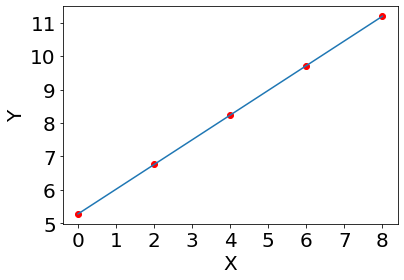

In [29]:
plt.plot(x_new[:,0],y_new)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x_new[:,0],y_new,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.vlines(x_new[:,0],y_new)
#plt.show()

# Part 3 - Polynomial Regression
For this, we need to first convert the variable x to a nonlinear form e.g. $x^2$ and and then do a linear regression against known values of y
$f(x) = b + w_1 \times x + w_2 \times x^2 + w_3 \times x^3$

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [31]:
x = np.array([2, 12, 22, 33, 46, 65]).reshape((-1, 1))
y = np.array([7, 9, 10, 18, 26, 31])
#  6.99999983  8.99999984  9.99999988 17.99999991 26.00000011 31.00000043

In [32]:
#transformer = PolynomialFeatures(degree=3, include_bias=False)
# include_bias=True is default. It will make all the powers of polynomial terms to be zero.
# We do not need currently.

In [33]:
x_ = PolynomialFeatures(degree=5, include_bias=False).fit_transform(x)
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# x_ = transformer.fit_transform(x)
# In practice, when you write Python code, and you use PolynomialFeatures together with 
# sklearn.linear_model.LinearRegression, the latter takes care by default of adding a column 
# of 1s (since in LinearRegression the fit_intercept parameter is True by default), 
# so you don't need to add it as well in PolynomialFeatures. Therefore, in PolynomialFeatures 
# one usually keeps include_bias=False.

In [34]:
print(x_)

[[2.00000000e+00 4.00000000e+00 8.00000000e+00 1.60000000e+01
  3.20000000e+01]
 [1.20000000e+01 1.44000000e+02 1.72800000e+03 2.07360000e+04
  2.48832000e+05]
 [2.20000000e+01 4.84000000e+02 1.06480000e+04 2.34256000e+05
  5.15363200e+06]
 [3.30000000e+01 1.08900000e+03 3.59370000e+04 1.18592100e+06
  3.91353930e+07]
 [4.60000000e+01 2.11600000e+03 9.73360000e+04 4.47745600e+06
  2.05962976e+08]
 [6.50000000e+01 4.22500000e+03 2.74625000e+05 1.78506250e+07
  1.16029062e+09]]


In [35]:
model = LinearRegression().fit(x_, y)

In [36]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 1.0
intercept: 4.211159584309531
coefficients: [ 1.76535914e+00 -2.03461388e-01  9.32652914e-03 -1.67347056e-04
  1.03216928e-06]


In [37]:
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 7.00000003  9.00000002 10.00000001 17.99999999 25.99999998 30.99999997]


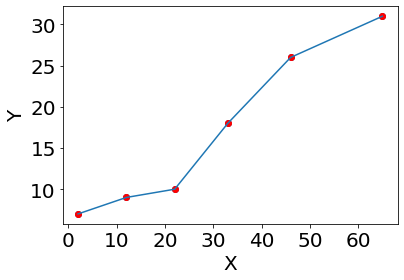

In [38]:
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x,y,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.vlines(x_new[:,0],y_new) # No vertical lines needed in this case since the fit is passing through all the points.
plt.show()

In [39]:
import numpy as np
x=np.linspace(-10, 10, 101)
print(x)

[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.
   9.2   9.4   9.6   9.8  10. ]


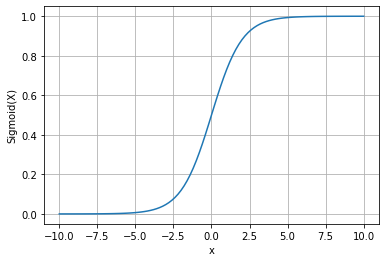

In [40]:
z_logistic = 1/(1 + np.exp(-x))
plt.plot(x, z_logistic)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

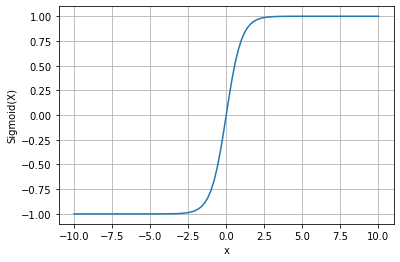

In [41]:
z_tanh = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
plt.plot(x, z_tanh)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

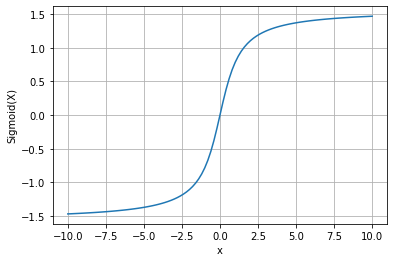

In [42]:
z_arctan = np.arctan(x)
plt.plot(x, z_arctan)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

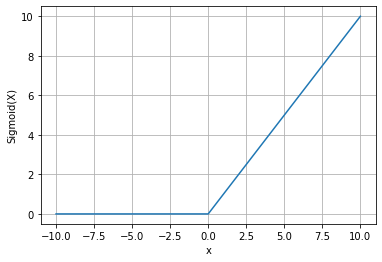

In [43]:
def relu(r):
    return(np.maximum(0,r))
z_relu=relu(x)
plt.plot(x, z_relu)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

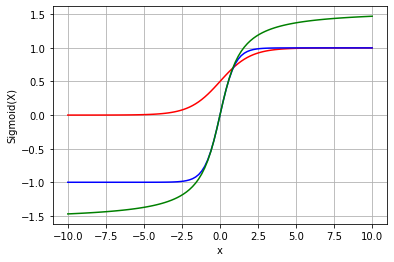

In [44]:
plt.plot(x, z_logistic,color="red")
plt.plot(x, z_tanh,color="blue")
plt.plot(x, z_arctan,color="green")
#plt.plot(x, z_relu)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

In [45]:
xdata=np.array([0,0.4,0.8,1.2,3.2,3.6,4,4.8,6,8,9.2])
ydata=np.array([0.0,0.00,0.01,0.03,0.98,0.99,0.99,0.97,0.9968,0.9999240,0.9999])
from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)
p0 = [max(ydata), np.median(xdata),1,min(ydata)] # initial guess
popt, pcov = curve_fit(sigmoid, xdata, ydata,p0,method='dogbox')#,p0, method='dogbox')
print(popt)
print(pcov)

[9.91214856e-01 2.07807979e+00 3.93717952e+00 4.19621304e-04]
[[ 5.97454933e-05  1.47941971e-05 -1.97651821e-03 -4.12622743e-05]
 [ 1.47941971e-05  1.32798864e-02 -3.33579140e-02  1.80694127e-04]
 [-1.97651821e-03 -3.33579140e-02  2.50466704e-01  1.07022817e-03]
 [-4.12622743e-05  1.80694127e-04  1.07022817e-03  3.99477747e-05]]


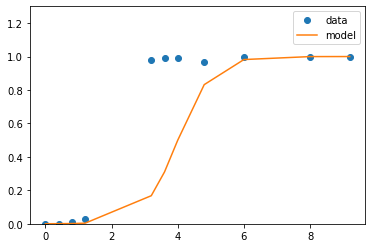

In [46]:
x = xdata
y = sigmoid(x,1,4.0,2,0)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x,y, label='model')
plt.ylim(0, 1.3)
plt.legend(loc='best')

### Logistic function is chosen for logistic regression is due to an assumption that the two classes that are both normally distributed. In such case the logistic function naturally arises from the ratio of normal probability density functions.
### $$\sigma(x) = \frac{pdf(y=1)}{pdf(y=0)+pdf(y=1)}$$

## Example 4: Larger problem of linear regression

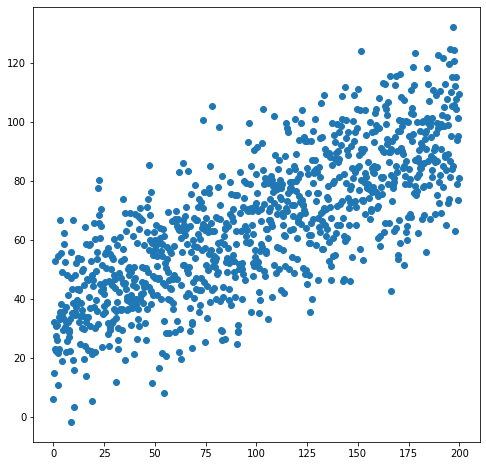

In [47]:
import matplotlib.pyplot as plt
#import seaborn as sns
#import subplots
#sns.set()
fig, ax = plt.subplots(figsize=(8, 8))
#x = np.arange(1000)
#delta = np.random.uniform(-20,20, size=(1000,))
#y = .4 * x +3 + delta
x= np.linspace(0, 200, 1000) # 1000 values between 0 and 200
delta = np.random.normal(-15, 15, x.size)
y= 0.3*x + 50 + delta
plt.scatter(x,y)

In [48]:
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)
x=x.reshape((-1, 1))
y=y.reshape((-1, 1))
model = LinearRegression(fit_intercept=True).fit(x, y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000,)
(1000,)


In [49]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.579287928628575
intercept: [33.90636559]
slope: [[0.31279187]]


In [50]:
y_pred = model.predict(x)
#print('predicted response:', y_pred, sep='\n')

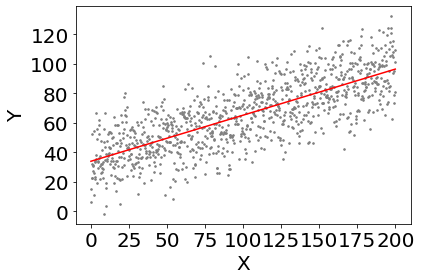

In [51]:
plt.plot(x,y_pred,color='red')
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x,y,color='grey', marker='.', s=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.scatter(x,y+dy)
#plt.vlines(x,y,y_pred)
plt.show()

In [52]:
def tss(x):
    return ((x - np.mean(x))**2).sum()

In [53]:
tss_value=tss(y)

In [54]:
def rss(y,y_pred):
    return ((y - y_pred)**2).sum()

In [55]:
rss_value=rss(y,y_pred)

In [56]:
R2 = 1 - rss_value / tss_value
print(R2)

0.579287928628575


In [57]:
samples = 1000
# generating random samples
#print(np.random.choice(samples, size=10)) 
# generating random samples without replacement
selected_indices=np.random.choice(samples, size=10, replace=False)
print(selected_indices)

[761 937 671 675 291 136  59 130 984 474]


In [58]:
x_sample=np.take(x, selected_indices, 0)
y_sample=np.take(y, selected_indices, 0)
#print(x_sample)
#print(y_sample)

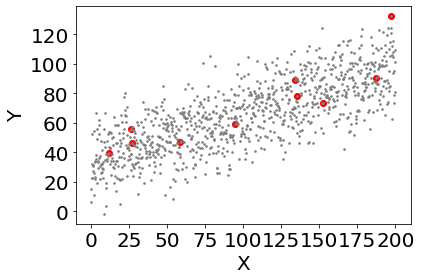

In [59]:
plt.scatter(x_sample,y_sample,color='red')
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x,y,color='grey', marker='.', s=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.scatter(x,y+dy)
#plt.vlines(x,y,y_pred)
plt.show()

In [60]:
model_sample = LinearRegression(fit_intercept=True).fit(x_sample, y_sample)
r_sq_sample = model.score(x_sample, y_sample)
print('coefficient of determination:', r_sq_sample)
print('intercept:', model_sample.intercept_)
print('slope:', model_sample.coef_)
y_pred_sample = model_sample.predict(x_sample)
#print('predicted response:', y_pred_sample, sep='\n')

coefficient of determination: 0.7368471496649651
intercept: [33.93108105]
slope: [[0.36303404]]


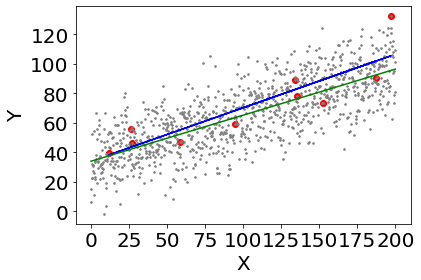

In [61]:
plt.scatter(x_sample,y_sample,color='red')
plt.plot(x_sample,y_pred_sample,color='blue')
plt.plot(x,y_pred,color='red')
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x,y,color='grey', marker='.', s=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.scatter(x,y+dy)
#plt.vlines(x,y,y_pred)
plt.show()

## Calculated slope
$$\Large \hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n} (x_i - \overline{x})^2}$$

## Calculated intercept
$$\Large \hat{\beta}_0 = \overline{y} - \hat{\beta}_1 \overline{x}$$

In [62]:
def beta_1(x,y):
    return ((x - np.mean(x))*(y - np.mean(y))).sum() / ((x - np.mean(x))**2).sum()
def beta_0(x,y,beta1):
    return np.mean(y)-beta1*np.mean(x)

In [63]:
intercept = beta_1(x,y)
slope = beta_0(x,y,intercept)
print(intercept)
print(slope)

0.312791871520302
33.90636559232102


## A few things to verify
$$\Large  SE(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$\Large  SE(\hat{\beta_0})^2 = \sigma^2 \left[ \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2} \right]$$

$$ \Large Var(\hat{\mu}) = SE(\hat{\mu})^2 = \frac{\sigma^2}{n}$$